# 1. Extract Data

In [3]:
import os
print(os.listdir(path="..\\"))

['.gitkeep', 'ANN', 'Employee_attrition.csv', 'Housing.csv', 'Income&Expenditure.csv']


In [4]:
import pandas as pd
data=pd.read_csv("..\\Employee_attrition.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


# 2. EDA

In [5]:
data.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

# 3. Feature Extraction

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in data.columns[data.dtypes=="object"]:
    f(i)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Employee ID               59598 non-null  int64
 1   Age                       59598 non-null  int64
 2   Gender                    59598 non-null  int32
 3   Years at Company          59598 non-null  int64
 4   Job Role                  59598 non-null  int32
 5   Monthly Income            59598 non-null  int64
 6   Work-Life Balance         59598 non-null  int32
 7   Job Satisfaction          59598 non-null  int32
 8   Performance Rating        59598 non-null  int32
 9   Number of Promotions      59598 non-null  int64
 10  Overtime                  59598 non-null  int32
 11  Distance from Home        59598 non-null  int64
 12  Education Level           59598 non-null  int32
 13  Marital Status            59598 non-null  int32
 14  Number of Dependents      59598 non-nu

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.pairplot(data)
plt.show()

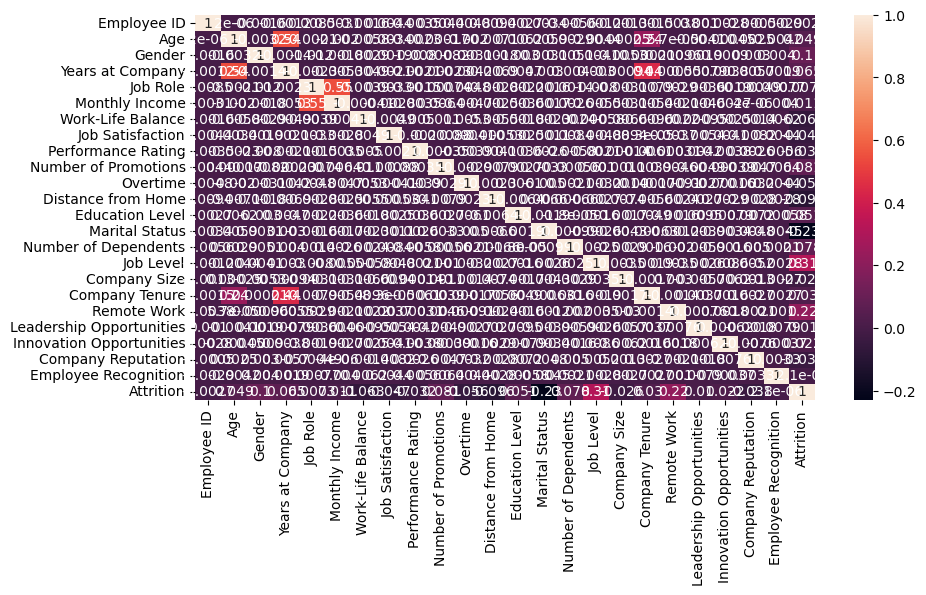

In [9]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

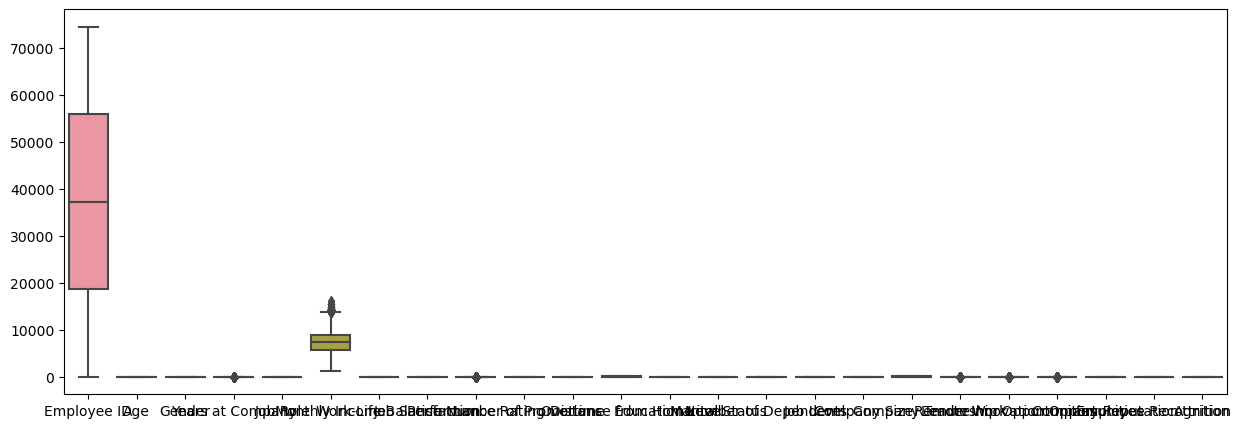

In [10]:
plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.show()

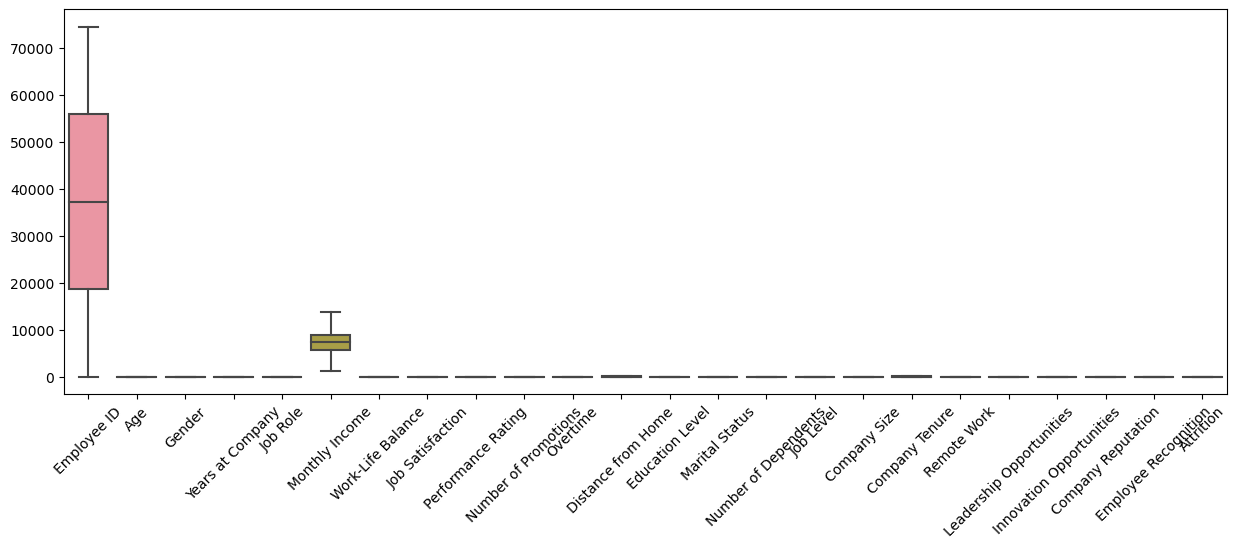

In [11]:
def f(i):
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q3-q1

    ll=q1-(IQR*1.5)
    ul=q3+(IQR*1.5)
    data.loc[data[i]<ll,i]=ll
    data.loc[data[i]>ul,i]=ul

for i in data.columns:
    f(i)

plt.figure(figsize=[15,5])
sns.boxplot(data)
plt.xticks(rotation=45)
plt.show()

In [12]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,8410.0,31.0,1.0,19,0.0,5390,0.0,2,0.0,2,...,1.0,0.0,1.0,1.0,89,0,0,0,0.0,2.0
1,64756.0,59.0,0.0,4,3.0,5534,3.0,0,2.5,3,...,0.0,3.0,1.0,1.0,21,0,0,0,1.0,1.0
2,30257.0,24.0,0.0,10,2.0,8159,2.0,0,2.5,0,...,1.0,3.0,1.0,1.0,74,0,0,0,3.0,1.0
3,65791.0,36.0,0.0,7,0.0,3989,2.0,0,2.0,1,...,2.0,2.0,1.0,2.0,50,0,0,0,2.0,2.0
4,65026.0,56.0,1.0,41,0.0,4821,1.0,3,0.0,0,...,0.0,0.0,2.0,1.0,68,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195.0,50.0,0.0,12,0.0,4414,1.0,0,0.0,1,...,2.0,2.0,2.0,2.0,35,0,0,0,3.0,3.0
59594,6266.0,18.0,1.0,4,2.0,8040,1.0,0,2.0,3,...,2.0,0.0,2.0,1.0,73,0,0,0,1.0,2.0
59595,54887.0,22.0,0.0,14,4.0,7944,1.0,0,2.0,0,...,1.0,2.0,0.0,2.0,29,0,0,0,2.0,2.0
59596,861.0,23.0,1.0,8,0.0,2931,1.0,3,0.0,0,...,2.0,0.0,0.0,0.0,9,0,0,0,2.0,1.0


In [13]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59593    0.0
59594    0.0
59595    1.0
59596    0.0
59597    1.0
Name: Attrition, Length: 59598, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(x_train)
x_test=mm.transform(x_test)

y_train=mm.fit_transform(y_train.values.reshape(-1,1))
y_test=mm.transform(y_test.values.reshape(-1,1))


# 4 . ANN Layers

In [16]:
from tensorflow import keras
model=keras.Sequential()

model.add(keras.layers.Dense(units=20,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="relu"))
model.add(keras.layers.Dense(units=1,activation="sigmoid"))


In [17]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6471 - loss: 0.6271 - val_accuracy: 0.6920 - val_loss: 0.5718
Epoch 2/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6928 - loss: 0.5731 - val_accuracy: 0.6999 - val_loss: 0.5625
Epoch 3/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6981 - loss: 0.5682 - val_accuracy: 0.7065 - val_loss: 0.5580
Epoch 4/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6950 - loss: 0.5688 - val_accuracy: 0.7059 - val_loss: 0.5591
Epoch 5/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6975 - loss: 0.5683 - val_accuracy: 0.7048 - val_loss: 0.5588
Epoch 6/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6979 - loss: 0.5662 - val_accuracy: 0.7045 - val_loss: 0.5584
Epoch 7/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7009 - loss: 0.5644 - val_accuracy: 0.7038 - val_loss: 0.5606
Epoch 8/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7019 - loss: 0.5622 - 

# 6. Model Evaluation

In [19]:
y_pred=model.predict(x_test)
y_pred

373/373 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.77694577],
       [0.54658866],
       [0.2469322 ],
       ...,
       [0.5273334 ],
       [0.43032977],
       [0.38137856]], dtype=float32)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score,classification_report
import numpy as np
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
#print(accuracy_score(y_test,y_pred))
print(r2_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

0.3816947889329878
0.18879274002468843
0.43450286538144767
0.24288509853957352


# 7. Result visualization

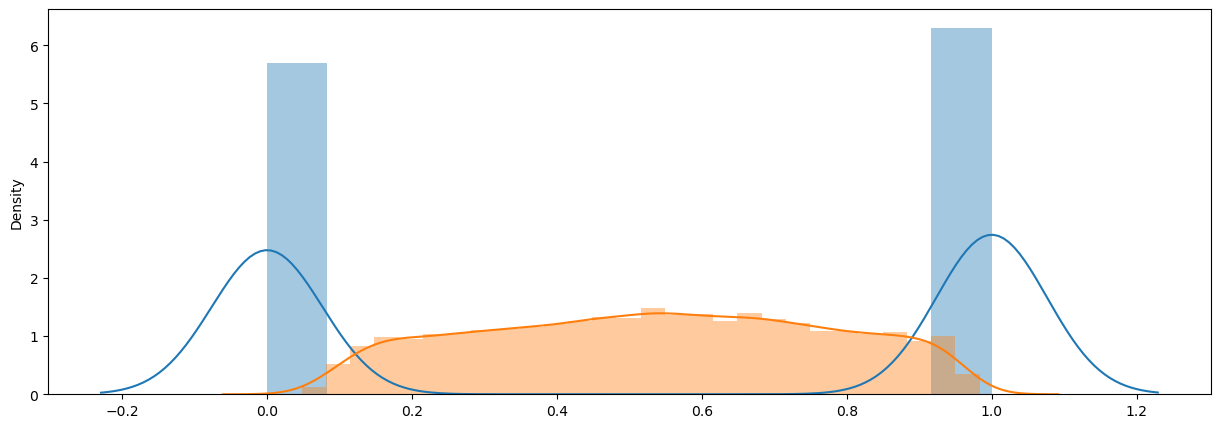

In [21]:
plt.figure(figsize=[15,5])
sns.distplot(y_test)
sns.distplot(y_pred)
plt.show()

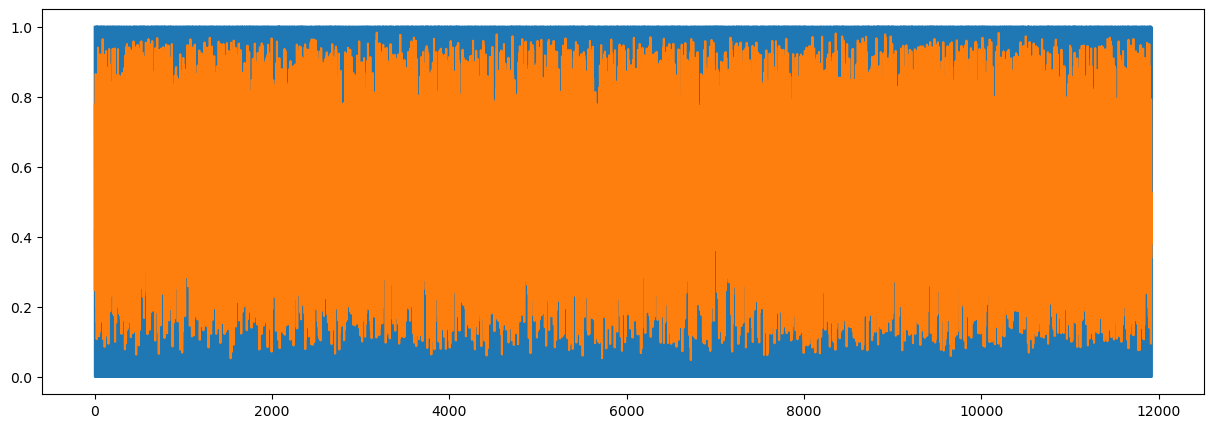

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
plt.plot(y_test)
plt.plot(y_pred)
plt.show()